**Дано**: В компании «Мегалайн» — федерального оператора сотовой связи клиентам предлагают два тарифных плана:
- «Смарт»
- «Ультра».

**Цель**: понять, какой тариф приносит больше денег.

**Необходимо**: Вам предстоит сделать предварительный анализ тарифов на небольшой выборке 500 клиентов за 2018 год.

# Предварительная работа

Подключаю библиотеки

In [ ]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
from scipy import stats  as st

Прописываю свои вспомогательные функции

In [ ]:
#Функция для получения информации о столбце
#На входе имя столбца и дата фрейм
def isnull_columns(column_name, data_framee):
    print('В столбце ',column_name)
    print('Количество ячеек всего:    ',data_framee[column_name].isnull().count())
    print('Количество непустых ячеек: ',data_framee[column_name].count())
    print('Количество пустых ячеек:   ',data_framee[column_name].isnull().sum())
    print('Доля пропусков:            ',data_framee[column_name].isna().mean().astype('int') , '%')
    print('Тип данных в столбце:      ',data_framee[column_name].dtype)
    print('Кол-во уникальных значений:',len(data_framee[column_name].sort_values().unique()))
    print()

In [ ]:
#Словари с описанием имен колонок
#Для описания работы мне периодически будет необходимо название и описание столбца,
# а искать его в описании работы не очень удобно

df_callsc_cn = {
    'id': 'id — уникальный номер звонка',
    'call_date': 'call_date — дата звонка',
    'duration': 'duration — длительность звонка в минутах',
    'user_id': 'user_id — идентификатор пользователя, сделавшего звонок'
    }

df_internet_cn = {
    'id' : 'id — уникальный номер сессии',
    'mb_used' : 'mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)',
    'session_date' : 'session_date — дата интернет-сессии',
    'user_id' : 'user_id — идентификатор пользователя'
    }


df_tariffs_cn = {
    'tariff_name' : 'tariff_name — название тарифа',
    'rub_monthly_fee' : 'rub_monthly_fee — ежемесячная абонентская плата в рублях',
    'minutes_included' : 'minutes_included — количество минут разговора в месяц, включённых в абонентскую плату',
    'messages_included' : 'messages_included — количество сообщений в месяц, включённых в абонентскую плату',
    'mb_per_month_included' : 'mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)',
    'rub_per_minute' : 'rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)',
    'rub_per_message' : 'rub_per_message — стоимость отправки сообщения сверх тарифного пакета',
    'rub_per_gb' : 'rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)',
    }

df_messages_cn = {
    'id' : 'id — уникальный номер сообщения',
    'message_date' : 'message_date — дата сообщения',
    'user_id' : 'user_id — идентификатор пользователя, отправившего сообщение'
    }

df_users_cn = {
    'iuser_id' : 'iuser_id — уникальный идентификатор пользователя',
    'ifirst_name' : 'ifirst_name — имя пользователя',
    'ilast_name' : 'ilast_name — фамилия пользователя',
    'iage' : 'iage — возраст пользователя (годы)',
    'ireg_date' : 'ireg_date — дата подключения тарифа (день, месяц, год)',
    'ichurn_date' : 'ichurn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)',
    'icity' : 'icity — город проживания пользователя',
    'itariff' : 'itariff — название тарифного плана'
     }

df_total_cn = {
    'user_id' : 'user_id — уникальный идентификатор пользователя',
    'tariff_name' : 'tariff_name — название тарифа',
    'month' : 'month — месяц',
    'message_count' : 'message_count — количество сообщений',
    'message_over_rub' : 'message_over_rub — оплата за сообщения сверх включённых в аб. плату',
    'gb_used_value' : 'gb_used_value — количество Гб',
    'gb_over_rub' : 'gb_over_rub — оплата за Гб сверх включённых в аб. плату',
    'calls_count' : 'calls_count — количество звонков',
    'calls_duration' : 'calls_duration — длительность звонков',
    'minutes_over_rub' : 'minutes_over_rub — оплата за минуты звонков сверх включённых в аб. плату',
    'rub_monthly_total' : 'rub_monthly_total — общая плата за месяц в рублях',
    'rub_monthly_fee' : 'rub_monthly_fee — ежемесячная абонентская плата в рублях'
    }

#Функция, которая описывает колонку по имени
#Нужна мне для описательного процесса, поэтому выдаёт описание по всем словарям
def about_column(colunm):
    print('callsc:  ', df_callsc_cn.get(colunm, 'н.д.'))
    print('internet:', df_internet_cn.get(colunm, 'н.д.'))
    print('tariffs: ', df_tariffs_cn.get(colunm, 'н.д.'))
    print('messages:', df_messages_cn.get(colunm, 'н.д.'))
    print('users:   ', df_users_cn.get(colunm, 'н.д.'))
    print('df_total:', df_total_cn.get(colunm, 'н.д.'))


In [ ]:
#Функция, которая показывает уникальные значения в столбцах датафрейма
def unique_val(df):
    for column_name in df.columns:
        print('\nУникальные значения в столбце',column_name, '(', len(df[column_name].unique()), 'уникальных)')
        print('Уникальные значения:')
        print(df[column_name].sort_values().unique())

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
#информация о пользователях
df_users    = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

#информация о звонках
df_calls    = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')

#информация об интернет-сессиях
df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')

#информация о сообщениях
df_messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')

#информация о тарифах
df_tariffs  = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

# Шаг 2. Подготовьте данные

#### df_users — информация о пользователях

In [ ]:
#Первые 5 столбцов df_users
display(df_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
#вызов метода info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Имена столбцов** корректные

**Пропуски** только в столбце churn_date, т.е. там, где пользование тарифом не прекращено. Заменять их на значения или удалять нет необходимости.

**Типы данных** нужно именить в столбцах, содержащих даты на datetime:
- churn_date
- reg_date

In [ ]:
#Изменение форматов даты
df_users['reg_date']=pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date']=pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

#Проверка
df_users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [ ]:
#Уникальные значение в столбцах через функцию
unique_val(df_users)


Уникальные значения в столбце user_id ( 500 уникальных)
Уникальные значения:
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181

In [ ]:
#Проверяю случаи, что расторжение договора произошло раньше регитсрации
display(df_users.dropna(subset=['churn_date']).query('churn_date < reg_date') )

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


Таких случаев нет.

In [ ]:
#Описание методом describe()
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Ошибок в данных не обнаружил.

#### df_calls — информация о звонках

In [ ]:
#Первые 5 столбцов df_calls
display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
#вызов метода info()
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Имена столбцов** корректные

**Пропуски** отсутствуют

**Типы данных** нужно именить в столбцах:
- call_date на datetime
- duration на int (предварительно нужно округлить в большую сторону)

Необходимо для выполнения задания **добавить столбец с месяцем**

In [ ]:
#Изменение форматов даты
df_calls['call_date']= pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

#Добавление месяца
df_calls['month'] = df_calls['call_date'].dt.month

#Переупорядочение столбцов
df_calls = df_calls[['id', 'user_id', 'month', 'call_date', 'duration']]

#Проверка
df_calls.dtypes

id                   object
user_id               int64
month                 int64
call_date    datetime64[ns]
duration              int64
dtype: object

In [ ]:
#Уникальные значение в столбцах через функцию
unique_val(df_calls)


Уникальные значения в столбце id ( 202607 уникальных)
Уникальные значения:
['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']

Уникальные значения в столбце user_id ( 492 уникальных)
Уникальные значения:
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1107 1108 1109 1110 1111 1112 1113
 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127
 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142
 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156
 

In [ ]:
#Описание методом describe()
df_calls.describe()

,user_id,month,duration
count,202607.000000,202607.000000,202607.000000
mean,1253.940619,8.574067,7.158198
std,144.722751,2.787093,5.959173
min,1000.000000,1.000000,0.000000
25%,1126.000000,7.000000,2.000000
50%,1260.000000,9.000000,6.000000
75%,1379.000000,11.000000,11.000000
max,1499.000000,12.000000,38.000000


Ошибок не обнаружил

#### df_internet — информация об интернет-сессиях

In [ ]:
#Первые 5 столбцов df_internet
display(df_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
#вызов метода info()
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Имена столбцов** корректные те, которые присутствуют в списке столбцов в описании задания. Столбец `Unnamed: 0` в описании задания отсутствует. Не думаю, что он мне понадобится (если это случится, я могу удалить эту часть кода), так что его я удалю

**Пропуски** отсутствуют

**Типы данных** в session_date нужно именить на datetime:

Необходимо для выполнения задания **добавить столбец с месяцем**

In [ ]:
#Удаляю столбец
df_internet = df_internet.drop(columns = ['Unnamed: 0'],axis = 1)

#Изменение форматов даты
df_internet['session_date']=pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

#Добавление месяца
df_internet['month'] = df_internet['session_date'].dt.month

#Переупорядочение столбцов
df_internet = df_internet[['id', 'user_id', 'month', 'session_date', 'mb_used']]

#Проверка
df_internet.dtypes

id                      object
user_id                  int64
month                    int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [ ]:
#Уникальные значение в столбцах через функцию
unique_val(df_internet)


Уникальные значения в столбце id ( 149396 уникальных)
Уникальные значения:
['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']

Уникальные значения в столбце user_id ( 497 уникальных)
Уникальные значения:
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140
 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154
 

In [ ]:
#Описание методом describe()
df_internet.describe().astype('int') #Добавила приведение к целому числу

,user_id,month,mb_used
count,149396,149396,149396
mean,1252,8,370
std,144,2,278
min,1000,1,0
25%,1130,7,138
50%,1251,9,348
75%,1380,11,559
max,1499,12,1724


Ошибок не обнаружил

##### Поиск аномалии в трафике, которую я пропустила в первый раз

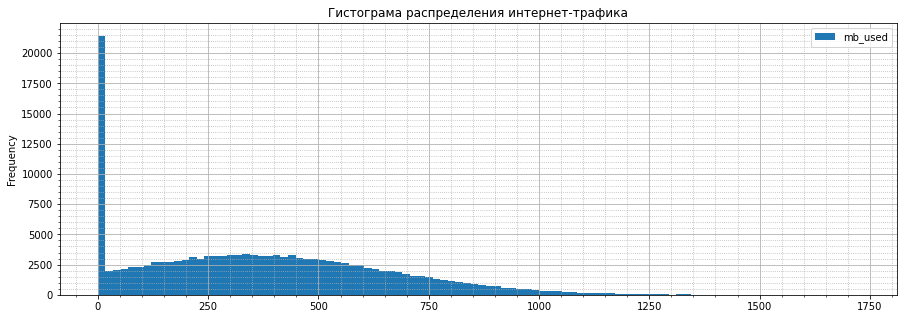

In [ ]:
df_internet.plot(
    kind = 'hist',
    y = 'mb_used',
    bins=100,
    figsize=(15,5),
    title = 'Гистограма распределения интернет-трафика',
    grid=True
)

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

На графике видно, что на потреблении интернета = 0 мб происходит скачек
Моя гипотеза - это люди, у которых не было использования интернета. Посмотрю, сколько всего полтзователей в выборке интернета. По условиям задачи из должно быть всего 500

In [ ]:
print('Количество пользователей в таблице', df_internet['user_id'].nunique())
print('Количество пользователей с нулевым потреблением трафика', df_internet.query('mb_used == 0')['user_id'].nunique())

#Нужно посомтреть, что в таблице по этим сессиям
display(df_internet.query('mb_used == 0').head())

#Легче не стало. Посмотрю по рандомному пользователю данные.
display(df_internet.query('mb_used == 0 and user_id == 1000').sort_values(by = ['month','id']))

#Так, пустые сессии не были последними в его карьере, как абонента

#Проверю расчеты, может где-то была ошибка с округлением
df_internet_for_test = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
df_internet_for_test['session_date']=pd.to_datetime(df_internet_for_test['session_date'], format='%Y-%m-%d')
df_internet_for_test['month'] = df_internet_for_test['session_date'].dt.month
df_internet_for_test['bit'] = df_internet_for_test['mb_used']*1024*1024*8
display(df_internet_for_test.query('user_id == 1000').sort_values(by = ['month','id']))
#До меньше бита быть не может, значит, дело не в этом

Количество пользователей в таблице 497
Количество пользователей с нулевым потреблением трафика 494


,id,user_id,month,session_date,mb_used
11,1000_11,1000,8,2018-08-28,0.0
38,1000_38,1000,11,2018-11-27,0.0
46,1000_46,1000,6,2018-06-30,0.0
67,1000_67,1000,6,2018-06-16,0.0
72,1000_72,1000,6,2018-06-15,0.0


,id,user_id,month,session_date,mb_used
103,1000_103,1000,5,2018-05-26,0.0
131,1000_131,1000,6,2018-06-15,0.0
193,1000_193,1000,6,2018-06-17,0.0
46,1000_46,1000,6,2018-06-30,0.0
67,1000_67,1000,6,2018-06-16,0.0
72,1000_72,1000,6,2018-06-15,0.0
157,1000_157,1000,7,2018-07-11,0.0
11,1000_11,1000,8,2018-08-28,0.0
201,1000_201,1000,8,2018-08-21,0.0
111,1000_111,1000,9,2018-09-01,0.0


,Unnamed: 0,id,mb_used,session_date,user_id,month,bit
103,103,1000_103,0.00,2018-05-26,1000,5,0.000000e+00
134,134,1000_134,717.66,2018-05-31,1000,5,6.020168e+09
51,51,1000_51,628.41,2018-05-31,1000,5,5.271485e+09
59,59,1000_59,363.20,2018-05-28,1000,5,3.046742e+09
96,96,1000_96,544.22,2018-05-28,1000,5,4.565248e+09
...,...,...,...,...,...,...,...
55,55,1000_55,348.64,2018-12-10,1000,12,2.924604e+09
58,58,1000_58,10.23,2018-12-28,1000,12,8.581546e+07
68,68,1000_68,740.21,2018-12-07,1000,12,6.209332e+09
75,75,1000_75,400.85,2018-12-01,1000,12,3.362574e+09


Я убедился, что не потерял информацию округлением

Теперь могу принять решение по нулевым сессиям: не буду их трогать, так как далее они не влияют на вычисления. В конечной таблице я их все равно сложу со всеми остальными сессиями.

#### df_messages — информация о сообщениях

In [ ]:
#Первые 5 столбцов df_messages
display(df_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
#вызов метода info()
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Имена столбцов** корректные

**Пропуски** отсутствуют

**Типы данных** в message_date нужно именить на datetime

Необходимо для выполнения задания **добавить столбец с месяцем**

In [ ]:
#Изменение форматов даты
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

#Добавление месяца
df_messages['month'] = df_messages['message_date'].dt.month

#Переупорядочение столбцов
df_messages = df_messages[['id', 'user_id', 'month', 'message_date']]

#Проверка
df_messages.dtypes

id                      object
user_id                  int64
month                    int64
message_date    datetime64[ns]
dtype: object

In [ ]:
#Уникальные значение в столбцах через функцию
unique_val(df_messages)


Уникальные значения в столбце id ( 123036 уникальных)
Уникальные значения:
['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']

Уникальные значения в столбце user_id ( 426 уникальных)
Уникальные значения:
[1000 1002 1003 1004 1005 1007 1008 1009 1011 1012 1013 1014 1015 1016
 1018 1019 1020 1021 1022 1023 1025 1026 1027 1028 1029 1030 1031 1032
 1033 1034 1035 1036 1037 1038 1039 1041 1042 1043 1044 1045 1046 1047
 1048 1050 1051 1052 1054 1055 1056 1057 1058 1059 1060 1061 1062 1064
 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1079
 1080 1081 1082 1083 1084 1086 1087 1088 1089 1090 1091 1092 1093 1094
 1096 1097 1098 1099 1100 1102 1103 1104 1105 1106 1108 1109 1110 1111
 1112 1113 1115 1119 1121 1122 1123 1124 1125 1126 1127 1130 1131 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148
 1149 1150 1151 1154 1155 1156 1158 1159 1160 1161 1163 1164 1165 1166
 1167 1168 1169 1170 1171 1172 1173 1174 1176 1178 1180 1181 1182 1183
 

In [ ]:
#Описание методом describe()
df_messages.describe()

,user_id,month
count,123036.000000,123036.000000
mean,1256.989410,8.632262
std,143.523967,2.747328
min,1000.000000,1.000000
25%,1134.000000,7.000000
50%,1271.000000,9.000000
75%,1381.000000,11.000000
max,1499.000000,12.000000


Ошибок не обнаружил

#### df_tariffs — информация о тарифах

In [ ]:
#Первые 5 столбцов df_tariffs
display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
#вызов метода info()
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Имена столбцов** корректные

**Пропуски** отсутствуют

**Типы данных** корректные

Хочу поменять порядок столбцов, так как мне проще, когда столбец с именем первый

In [ ]:
#Перемена столбцов местами
df_tariffs = df_tariffs[['tariff_name', 'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']]

#Проверяю
df_tariffs.dtypes

tariff_name              object
messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
dtype: object

##### Итог по первой части подготовки данных
- Название столбцов корректные;
- Пропусков нет;
- Типы данных приведены к верным;
- Ошибки не обнаружены;
- Добавлены столбцы, необходимые для выполнения задания.

##### Подсчёт для каждого пользователя
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

##### df_calls_total — количество сделанных звонков и израсходованных минут разговора по месяцам

In [ ]:
#Собираю сводную
#Так как интересуют только звонки, на которых разговор состоялся, отсею продолжительность == 0
df_calls_total = pd.pivot_table(
    df_calls.query('duration > 0'),
    index = ['user_id', 'month'],
    values = ['duration'],
    aggfunc = ['count', 'sum']
)

#Корректирую имена столбцов
df_calls_total.columns = ['calls_count','calls_duration']

#Переношу user_id и month из столбцов
df_calls_total['user_id'] = df_calls_total.index.get_level_values(0).astype('int')
df_calls_total['month'] = df_calls_total.index.get_level_values(1).astype('int')

#Сбрасываю индексы
df_calls_total = df_calls_total.reset_index(drop=True)

#Переупорядочиваю столбцы
df_calls_total = df_calls_total[['user_id','month','calls_count','calls_duration']]

#Проверяю и заключаю в комментарий, если всё ок
#display(df_calls_total)

#С помощью merge() добавляю из таблицы пользователей данные о тарифе
df_calls_total = df_calls_total.merge(df_users[['user_id','tariff', 'city']], on='user_id', how='inner')

#Переименовываю столбец тарифа в имя, совпадающее с написанием в таблице с тарифами
df_calls_total = df_calls_total.rename(columns = {'tariff' : 'tariff_name'})

#С помощью merge() добавляю из таблицы тарифа данные по включенному пакету
df_calls_total = df_calls_total.merge(df_tariffs[['tariff_name','minutes_included','rub_per_minute']], on='tariff_name', how='inner')

#Проверяю и заключаю в комментарий, если всё ок
#display(df_calls_total)

#Находжу разницу между длительностью разговоров и лимитом. Если лимит больше израсходованного, то к оплате 0
#Находжу сумму к оплате за перерасход минут
df_calls_total['minutes_over_rub'] = np.maximum(df_calls_total['calls_duration'] - df_calls_total['minutes_included'], 0) * df_calls_total['rub_per_minute']

#Проверяю и заключаю в комментарий, если всё ок
#display(df_calls_total)

#Теперь удаляю столбцы, которые больше не нужны
df_calls_total = df_calls_total.drop(columns = ['minutes_included', 'rub_per_minute'],axis = 1)

#Проверяю
display(df_calls_total)


,user_id,month,calls_count,calls_duration,tariff_name,city,minutes_over_rub
0,1000,5,17,159,ultra,Краснодар,0
1,1000,6,28,172,ultra,Краснодар,0
2,1000,7,41,340,ultra,Краснодар,0
3,1000,8,42,408,ultra,Краснодар,0
4,1000,9,46,466,ultra,Краснодар,0
...,...,...,...,...,...,...,...
3163,1498,10,30,247,smart,Владикавказ,0
3164,1499,9,8,70,smart,Пермь,0
3165,1499,10,44,449,smart,Пермь,0
3166,1499,11,62,612,smart,Пермь,336


##### df_messages_total — количество отправленных сообщений по месяцам

In [ ]:
#Собираю сводную
df_messages_total = pd.pivot_table(
    df_messages,
    index = ['user_id', 'month'],
    values = ['message_date'],
    aggfunc = ['count']
)

#Корректирую имена столбцов
df_messages_total.columns = ['message_count']

#Переношу user_id и month из столбцов
df_messages_total['user_id'] = df_messages_total.index.get_level_values(0).astype('int')
df_messages_total['month'] = df_messages_total.index.get_level_values(1).astype('int')

#Сбрасываю индексы
df_messages_total = df_messages_total.reset_index(drop=True)

#Переупорядочиваю столбцы
df_messages_total = df_messages_total[['user_id','month','message_count']]

#Проверяю и заключаю в комментарий, если всё ок
#display(df_messages_total)

#С помощью merge() добавляю из таблицы пользователей данные о тарифе
df_messages_total = df_messages_total.merge(df_users[['user_id','tariff', 'city']], on='user_id', how='inner')

#Переименовываю столбец тарифа в имя, совпадающее с написанием в таблице с тарифами
df_messages_total = df_messages_total.rename(columns = {'tariff' : 'tariff_name'})

#С помощью merge() добавляю из таблицы тарифа данные по включенному пакету
df_messages_total = df_messages_total.merge(df_tariffs[['tariff_name','messages_included','rub_per_message']], on='tariff_name', how='inner')

#Проверяю и заключаю в комментарий, если всё ок
#display(df_messages_total)

#Находжу разницу между количеством сообщений и лимитом. Если лимит больше израсходованного, то к оплате 0
#Находжу сумму к оплате за перерасход минут
df_messages_total['message_over_rub'] = np.maximum(df_messages_total['message_count'] - df_messages_total['messages_included'], 0) * df_messages_total['rub_per_message']

#Проверяю и заключаю в комментарий, если всё ок
#display(df_messages_total)

#Теперь удаляю столбцы, которые больше не нужны
df_messages_total = df_messages_total.drop(columns = ['messages_included', 'rub_per_message'],axis = 1)

#Проверяю
display(df_messages_total)


,user_id,month,message_count,tariff_name,city,message_over_rub
0,1000,5,22,ultra,Краснодар,0
1,1000,6,60,ultra,Краснодар,0
2,1000,7,75,ultra,Краснодар,0
3,1000,8,81,ultra,Краснодар,0
4,1000,9,57,ultra,Краснодар,0
...,...,...,...,...,...,...
2712,1498,10,42,smart,Владикавказ,0
2713,1499,9,11,smart,Пермь,0
2714,1499,10,48,smart,Пермь,0
2715,1499,11,59,smart,Пермь,27


##### df_internet_total — объем израсходованного интернет-трафика по месяцам;

In [ ]:
#Собираю сводную
df_internet_total = pd.pivot_table(
    df_internet,
    index = ['user_id', 'month'],
    values = ['mb_used'],
    aggfunc = ['sum']
)

#Корректирую имена столбцов
df_internet_total.columns = ['mb_used_value']

#Переношу user_id и call_month из столбцов
df_internet_total['user_id'] = df_internet_total.index.get_level_values(0)
df_internet_total['month'] = df_internet_total.index.get_level_values(1)

#Сбрасываю индексы
df_internet_total = df_internet_total.reset_index(drop=True)

#Перевожу Мб в ГБ и оругляю трафик до 1 гб, столбец с мб удаляю
df_internet_total['gb_used_value'] = (df_internet_total['mb_used_value'] / 1024).apply(np.ceil).astype('int')
df_internet_total = df_internet_total.drop(columns=['mb_used_value'])

#Проверяю и заключаю в комментарий, если всё ок
#display(df_internet_total)

#С помощью merge() добавляю из таблицы пользователей данные о тарифе
df_internet_total = df_internet_total.merge(df_users[['user_id','tariff', 'city']], on='user_id', how='inner')

#Переименовываю столбец тарифа в имя, совпадающее с написанием в таблице с тарифами
df_internet_total = df_internet_total.rename(columns = {'tariff' : 'tariff_name'})

#С помощью merge() добавляю из таблицы тарифа данные по включенному пакету
df_internet_total = df_internet_total.merge(df_tariffs[['tariff_name','mb_per_month_included','rub_per_gb']], on='tariff_name', how='inner')

#Проверяю и заключаю в комментарий, если всё ок
display(df_internet_total)

#В условиях задачи округление трафика до 1гб
#Использование трафика уже округлено до 1гб
#Поэтому тариф так же приведу к гб, столбец с мб удаляю

df_internet_total['gb_per_month_included'] = (df_internet_total['mb_per_month_included'] / 1024).apply(np.ceil).astype('int')
df_internet_total = df_internet_total.drop(columns=['mb_per_month_included'])

#Проверяю и заключаю в комментарий, если всё ок
#display(df_internet_total)

#Находжу разницу между количеством сообщений и лимитом. Если лимит больше израсходованного, то к оплате 0
#Находжу сумму к оплате за перерасход минут
df_internet_total['gb_over_rub'] = np.maximum(df_internet_total['gb_used_value'] - df_internet_total['gb_per_month_included'], 0) * df_internet_total['rub_per_gb']

#Проверяю и заключаю в комментарий, если всё ок
#display(df_internet_total)

#Теперь удаляю столбцы, которые больше не нужны
df_internet_total = df_internet_total.drop(columns = ['gb_per_month_included', 'rub_per_gb'],axis = 1)

#Проверяю
display(df_internet_total)

,user_id,month,gb_used_value,tariff_name,city,mb_per_month_included,rub_per_gb
0,1000,5,3,ultra,Краснодар,30720,150
1,1000,6,23,ultra,Краснодар,30720,150
2,1000,7,14,ultra,Краснодар,30720,150
3,1000,8,14,ultra,Краснодар,30720,150
4,1000,9,15,ultra,Краснодар,30720,150
...,...,...,...,...,...,...,...
3198,1498,10,21,smart,Владикавказ,15360,200
3199,1499,9,2,smart,Пермь,15360,200
3200,1499,10,18,smart,Пермь,15360,200
3201,1499,11,18,smart,Пермь,15360,200


,user_id,month,gb_used_value,tariff_name,city,gb_over_rub
0,1000,5,3,ultra,Краснодар,0
1,1000,6,23,ultra,Краснодар,0
2,1000,7,14,ultra,Краснодар,0
3,1000,8,14,ultra,Краснодар,0
4,1000,9,15,ultra,Краснодар,0
...,...,...,...,...,...,...
3198,1498,10,21,smart,Владикавказ,1200
3199,1499,9,2,smart,Пермь,0
3200,1499,10,18,smart,Пермь,600
3201,1499,11,18,smart,Пермь,600


##### df_total — получение таблицы с данными по расходам абонентов

In [ ]:
#Склеиваю датафреймы один под другим
df_total = pd.concat([df_messages_total, df_internet_total, df_calls_total])

#Группирую строки по user_id и month. так я получу 1 строку для пары пользователь-месяц
#Сразу приведу к типу int
df_total = df_total.groupby(by=['user_id', 'month','tariff_name', 'city']).sum().astype('int')

#Переношу user_id и month из столбцов
df_total['user_id']     = df_total.index.get_level_values(0).astype('int')
df_total['month']       = df_total.index.get_level_values(1).astype('int')
df_total['tariff_name'] = df_total.index.get_level_values(2)
df_total['city']        = df_total.index.get_level_values(3)

#Сбрасываю индексы
df_total = df_total.reset_index(drop=True)

#Переупорядычиваю столбцы
df_total = df_total[['user_id', 'city','tariff_name','month','message_count','message_over_rub','gb_used_value','gb_over_rub','calls_count','calls_duration','minutes_over_rub']]

#Проверяю
display(df_total)

,user_id,city,tariff_name,month,message_count,message_over_rub,gb_used_value,gb_over_rub,calls_count,calls_duration,minutes_over_rub
0,1000,Краснодар,ultra,5,22,0,3,0,17,159,0
1,1000,Краснодар,ultra,6,60,0,23,0,28,172,0
2,1000,Краснодар,ultra,7,75,0,14,0,41,340,0
3,1000,Краснодар,ultra,8,81,0,14,0,42,408,0
4,1000,Краснодар,ultra,9,57,0,15,0,46,466,0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,smart,10,42,0,21,1200,30,247,0
3210,1499,Пермь,smart,9,11,0,2,0,8,70,0
3211,1499,Пермь,smart,10,48,0,18,600,44,449,0
3212,1499,Пермь,smart,11,59,27,18,600,62,612,336


In [ ]:
#Проверю,что суммы сходятся

display(pd.pivot_table(
    df_total,
    index = ['month'],
    values = ['gb_used_value','gb_over_rub','message_count','message_over_rub','calls_count','calls_duration','minutes_over_rub'],
    aggfunc = ['sum'],
    margins=True
))

display(pd.pivot_table(
    df_internet_total,
    index = ['month'],
    values = ['gb_used_value','gb_over_rub'],
    aggfunc = ['sum'],
    margins=True
))

display(pd.pivot_table(
    df_messages_total,
    index = ['month'],
    values = ['message_count','message_over_rub'],
    aggfunc = ['sum'],
    margins=True
))

display(pd.pivot_table(
    df_calls_total,
    index = ['month'],
    values = ['calls_count','calls_duration','minutes_over_rub'],
    aggfunc = ['sum'],
    margins=True
))

sum                                                         \
      calls_count calls_duration gb_over_rub gb_used_value message_count   
month                                                                      
1            1164          10784        5600           416           924   
2            2705          24455       13800           975          1924   
3            5383          48151       40600          1826          3648   
4            7504          66310       38850          2459          5179   
5           10116          88810       84750          3541          7298   
6           11833         105180       97500          4207          8983   
7           14780         131746      126500          5057         11320   
8           17257         153698      162250          6030         13088   
9           19446         173475      152550          6475         14759   
10          21757         193928      209450          7431         17114   
11          23664         210089      222250          8026         18244   
12          27385         243675      296650          9156         20555   
All        162994        1450301     1450750         55599        123036   

                                         
      message_over_rub minutes_over_rub  
month                                    
1                   72              153  
2                  321             2580  
3                 1158             7968  
4                 1233             9033  
5                 2262            11637  
6                 2790            14469  
7                 3489            20775  
8                 4410            28680  
9                 4434            33552  
10                5286            39081  
11                5835            41568  
12                7494            68721  
All              38784           278217

sum              
      gb_over_rub gb_used_value
month                          
1            5600           416
2           13800           975
3           40600          1826
4           38850          2459
5           84750          3541
6           97500          4207
7          126500          5057
8          162250          6030
9          152550          6475
10         209450          7431
11         222250          8026
12         296650          9156
All       1450750         55599

sum                 
      message_count message_over_rub
month                               
1               924               72
2              1924              321
3              3648             1158
4              5179             1233
5              7298             2262
6              8983             2790
7             11320             3489
8             13088             4410
9             14759             4434
10            17114             5286
11            18244             5835
12            20555             7494
All          123036            38784

sum                                
      calls_count calls_duration minutes_over_rub
month                                            
1            1164          10784              153
2            2705          24455             2580
3            5383          48151             7968
4            7504          66310             9033
5           10116          88810            11637
6           11833         105180            14469
7           14780         131746            20775
8           17257         153698            28680
9           19446         173475            33552
10          21757         193928            39081
11          23664         210089            41568
12          27385         243675            68721
All        162994        1450301           278217

Цифры сошлись.

Осталось получить сумму затрат. Название тарифа я сохранил, так что можно сразу по нему присоединять таблицу тарифов

In [ ]:
#К итоговой таблице приджойню тариф
df_total = df_total.merge(df_tariffs[['tariff_name','rub_monthly_fee']], on='tariff_name', how='inner')

#Сумма затрат (абоненская плата + сумма перерасходов сверх пакета)
df_total['rub_monthly_total'] = df_total['rub_monthly_fee'] + df_total['message_over_rub'] + df_total['gb_over_rub'] + df_total['minutes_over_rub']

#Проверка
display(df_total)

,user_id,city,tariff_name,month,message_count,message_over_rub,gb_used_value,gb_over_rub,calls_count,calls_duration,minutes_over_rub,rub_monthly_fee,rub_monthly_total
0,1000,Краснодар,ultra,5,22,0,3,0,17,159,0,1950,1950
1,1000,Краснодар,ultra,6,60,0,23,0,28,172,0,1950,1950
2,1000,Краснодар,ultra,7,75,0,14,0,41,340,0,1950,1950
3,1000,Краснодар,ultra,8,81,0,14,0,42,408,0,1950,1950
4,1000,Краснодар,ultra,9,57,0,15,0,46,466,0,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,smart,10,42,0,21,1200,30,247,0,550,1750
3210,1499,Пермь,smart,9,11,0,2,0,8,70,0,550,550
3211,1499,Пермь,smart,10,48,0,18,600,44,449,0,550,1150
3212,1499,Пермь,smart,11,59,27,18,600,62,612,336,550,1513


In [ ]:
df_users.user_id.unique().shape

In [ ]:
df_total.user_id.unique().shape

(498,)

Стало на 2 клиента меньше. Посмотрим по внимательнее

In [ ]:
df_internet_mistery_users = pd.pivot_table(
    df_internet_total,
    index = ['user_id'],
    values = ['gb_used_value'],
    aggfunc = ['sum']
)
df_internet_mistery_users.columns=['gb_used_value']

df_messages_mistery_users = pd.pivot_table(
    df_messages_total,
    index = ['user_id'],
    values = ['message_count'],
    aggfunc = ['sum']
)
df_messages_mistery_users.columns=['message_count']


df_calls_mistery_users = pd.pivot_table(
    df_calls_total,
    index = ['user_id'],
    values = ['calls_count'],
    aggfunc = ['sum']
)
df_calls_mistery_users.columns=['calls_count']

df_users_mistery_users = df_users.merge(df_internet_mistery_users, on = 'user_id', how='left')
df_users_mistery_users = df_users_mistery_users.merge(df_messages_mistery_users, on = 'user_id', how='left')
df_users_mistery_users = df_users_mistery_users.merge(df_calls_mistery_users,    on = 'user_id', how='left')
df_users_mistery_users = df_users_mistery_users.fillna(0)
df_users_mistery_users.info()

display(df_users_mistery_users.query('gb_used_value == 0 and message_count == 0 and calls_count == 0'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        500 non-null    int64         
 1   age            500 non-null    int64         
 2   churn_date     500 non-null    object        
 3   city           500 non-null    object        
 4   first_name     500 non-null    object        
 5   last_name      500 non-null    object        
 6   reg_date       500 non-null    datetime64[ns]
 7   tariff         500 non-null    object        
 8   gb_used_value  500 non-null    float64       
 9   message_count  500 non-null    float64       
 10  calls_count    500 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 46.9+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used_value,message_count,calls_count
128,1128,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,0.0
371,1371,50,2018-12-30 00:00:00,Омск,Ириней,Трофимов,2018-12-25,smart,0.0,0.0,0.0


Да, те 2 человека, данных по которым не было в таблице, нашлись. По ним не было движений и они больше не являются опльзователями оператора

In [ ]:
display(df_internet_total.query('user_id == 1128 or user_id == 1371'))
display(df_messages_total.query('user_id == 1128 or user_id == 1371'))
display(df_calls_total.query('user_id == 1128 or user_id == 1371'))

,user_id,month,gb_used_value,tariff_name,city,gb_over_rub


,user_id,month,message_count,tariff_name,city,message_over_rub


,user_id,month,calls_count,calls_duration,tariff_name,city,minutes_over_rub


**Что с ними делать**
Так как таблица `df_total_info` состоит из затрат пользователей, к которым прилефтджойнен справочник, а не наоборот, то эти два пользователя в него не попали и статистику не портят
Добавлять в таблицу я их не буду.

#####  Вывод

Данные подготовлены и проверены. В датафрейме `df_total` собраны в разрезе пользователей и месяцев:
- `call_count` — количество сделанных звонков;
- `calls_duration` — количество израсходованных минут разговора;
- `message_count` — количество отправленных сообщений ;
- `gb_used_value` — объем израсходованного интернет-трафика;
- `rub_monthly_total` — помесячную выручку с каждого пользователя, которая складывается из:
    - `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
    - `message_over_rub` — оплата за перерасход сообщений;
    - `minutes_over_rub` — оплата за перерасход минут разговора;
    - `gb_over_rub	` — оплата за перерасход интернета


# Шаг 3. Проанализируйте данные

### Подготовка

In [ ]:
#Функции получаеют на входе имя столбца и выдают дисперсию

#Для тарифа ультра
def var_for_column_ultra(column_name):
    #формула дистерсии variance = np.var(x)
    return round(np.var(df_total.query('tariff_name == "ultra"')[column_name], ddof=1),1)

#Для тарифа смарт
def var_for_column_smart(column_name):
    #формула дистерсии variance = np.var(x)
    return round(np.var(df_total.query('tariff_name == "smart"')[column_name], ddof=1),1)

In [ ]:
#----Для тарифа ультра

#Данные по тарифу ультра, с округлением до 1 знака после запятой
df_total_ultra_info = round(df_total.query('tariff_name == "ultra"').describe(),1).drop(columns=['user_id','month']).T

#Меняю типы данных
df_total_ultra_info[['count', 'min', 'max', 'mean', 'max', '25%', '50%', '75%']] = (df_total_ultra_info[['count', 'min', 'max', 'mean', 'max', '25%', '50%', '75%']]).astype('int')

#Вытаскиваю имя столбца из индекса
df_total_ultra_info['column_name'] = df_total_ultra_info.index

#Применяю функцию для поиска дисперсии
df_total_ultra_info['variance'] = df_total_ultra_info['column_name'].apply(var_for_column_ultra)

#Имя тарифа в столбец
df_total_ultra_info['tarif_name'] = 'ultra'




#----Для тарифа смарт

#Данные по тарифу смарт, с округлением до 1 знака после запятой
df_total_smart_info = round(df_total.query('tariff_name == "smart"').describe(),1).drop(columns=['user_id','month']).T

#Меняю типы данных
df_total_smart_info[['count', 'min', 'max', 'mean', 'max', '25%', '50%', '75%']] = (df_total_smart_info[['count', 'min', 'max', 'mean', 'max', '25%', '50%', '75%']]).astype('int')

#Вытаскиваю имя столбца из индекса
df_total_smart_info['column_name'] = df_total_smart_info.index

#Применяю функцию для поиска дисперсии
df_total_smart_info['variance'] = df_total_smart_info['column_name'].apply(var_for_column_smart)

#Имя тарифа в столбец
df_total_smart_info['tarif_name'] = 'smart'


#----Объединяю таблицы
df_total_info = pd.concat([df_total_ultra_info, df_total_smart_info])

#Проверяю
#display(df_total_info)

#Сбрасываю индексы
df_total_info = df_total_info.reset_index(drop=True)

#Меняю местами столбцы
df_total_info = df_total_info[['tarif_name','column_name','count','min',
                                           'mean','max','25%','50%','75%',
                                           'std','variance']]

#Дипазан нормальных значений (IQR)
df_total_info['x1'] = df_total_info['25%']  -  1.5 * (df_total_info['75%'] - df_total_info['25%'])
df_total_info['x1'] = (df_total_info[['x1','min']]).max(axis=1).astype('int')

df_total_info['x2'] = df_total_info['75%']  +  1.5 * (df_total_info['75%'] - df_total_info['25%'])
df_total_info['x2'] = (df_total_info[['x2','max']]).min(axis=1).astype('int')

#Проверяю
#display(df_total_info)

#Вывод таблицы скрываю, она мне понадобится дальше

#### `calls_duration`— длительность звонков, мин

Табличное описание данных


,tarif_name,column_name,count,min,mean,max,25%,50%,75%,std,variance,x1,x2
5,ultra,calls_duration,985,0,526,1673,284,518,752,317.6,100873.6,0,1454
14,smart,calls_duration,2229,0,417,1435,282,422,545,190.3,36219.3,0,939



Гистограммы частот


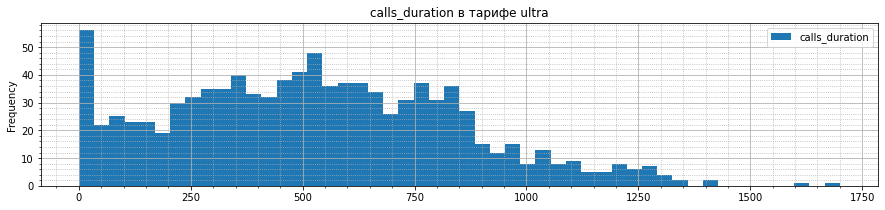

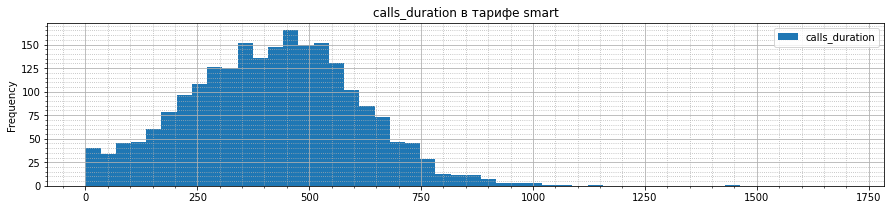

In [ ]:
indicator = 'calls_duration'
range_for_all_hist = (0,1700)
figsize_all_hist=(15,3)

print('Табличное описание данных')
display(df_total_info.query('column_name == @indicator'))

print('\nГистограммы частот')
df_total.query('tariff_name == "ultra"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе ultra',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

df_total.query('tariff_name == "smart"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе smart',
    grid=True,
    range = range_for_all_hist
)

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

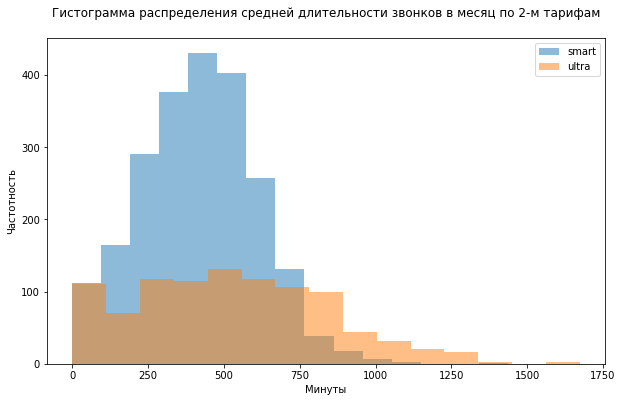

In [ ]:
# Сравнение тарифов на одном графике
plt.figure(figsize=(10, 6))
df_total['calls_duration'][df_total['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
df_total['calls_duration'][df_total['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()

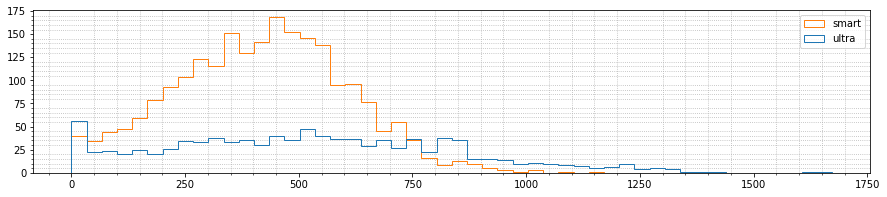

In [ ]:
ultra = df_total.query('tariff_name == "ultra"')[indicator]
smart = df_total.query('tariff_name == "smart"')[indicator]

plt.figure(figsize=figsize_all_hist)
plt.range = range_for_all_hist
plt.hist([ultra, smart], bins=50, label=['ultra', 'smart'],histtype='step')
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

По показателю "длительность звонков, мин" для одного абонента в месяц по тарифам:

**Средняя продолжительность** разговоров в тарифе ultra больше, чем в smart на 109 минут:
   - ultra 526
   - smart 417



**Максимальная продолжительность** разговора в тарифе ultra больше, чем в smart на 238 минут:
   - ultra 1'673
   - smart 1'435



**Дисперсия** и **стандартное** отклюнение в тарифе ultra выше, чем в тарифе smart, т.е. разброс по показателю в тарифе ultra выше:
- Дисперсия
   - ultra 100'874
   - smart  36'219
- Стандартное отклонение
   - ultra 318
   - smart 190

Из графиков и таблицы видно, что:

- В тарифе smart абонентам чаще всего требуется 422 минут в месяц.
- Большая часть значений находится в интервале 282 - 545 минут
- В тарифе ultra пики находится на 0 минут в месяц и на 500 минутах в месяц.
- Большая часть значений находится в интервале 284 - 752 минут


#### `message_count` — количество сообщений

Табличное описание данных


,tarif_name,column_name,count,min,mean,max,25%,50%,75%,std,variance,x1,x2
0,ultra,message_count,985,0,49,224,6,38,79,47.8,2285.3,0,188
9,smart,message_count,2229,0,33,143,10,28,51,28.2,796.8,0,112



Гистограммы частот


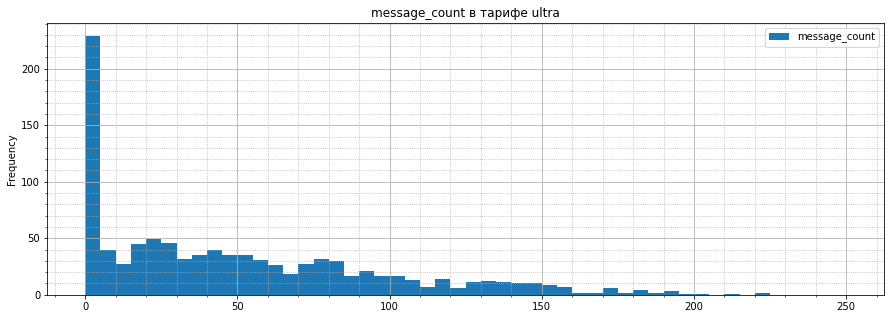

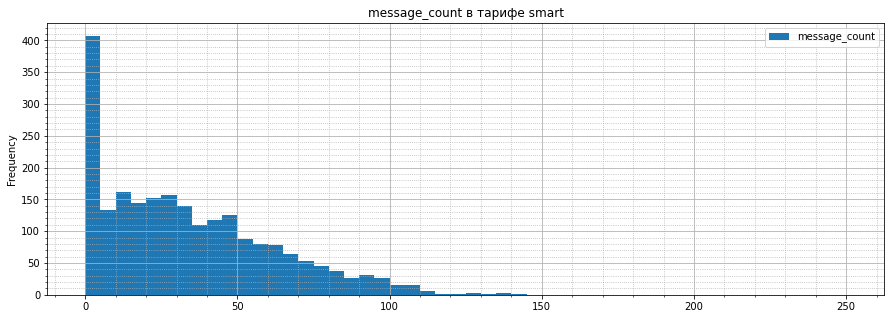

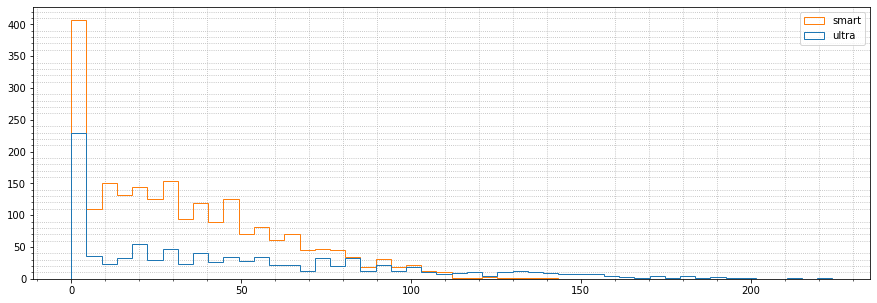

In [ ]:
indicator = 'message_count'
range_for_all_hist = (0,250)
figsize_all_hist=(15,5)

print('Табличное описание данных')
display(df_total_info.query('column_name == @indicator'))

print('\nГистограммы частот')
df_total.query('tariff_name == "ultra"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе ultra',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

df_total.query('tariff_name == "smart"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе smart',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()


ultra = df_total.query('tariff_name == "ultra"')[indicator]
smart = df_total.query('tariff_name == "smart"')[indicator]

plt.figure(figsize=figsize_all_hist)
plt.range = range_for_all_hist
plt.hist([ultra, smart], bins=50, label=['ultra', 'smart'],histtype='step')
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

По показателю "количество сообщений" для одного абонента в месяц по тарифам:

**Среднее количество** сообшений в тарифе ultra больше, чем в smart на 16 штук:
   - ultra 49
   - smart 33


**Максимальное количество** сообшений в тарифе ultra больше, чем в smart на 81 штуку:
   - ultra 224
   - smart 143



**Дисперсия** и **стандартное** отклюнение в тарифе ultra выше, чем в тарифе smart, т.е. разброс по показателю ultra выше:
- Дисперсия
   - ultra 2'285
   - smart  796
- Стандартное отклонение
   - ultra 48
   - smart 28

Из графиков и таблицы видно, что:

Для всех тарифов характерен пик на уровне 0 сообщений в месяц, т.е. чаще всего аобоненты не отправляют сообщения вовсе.

Для тех пользователей, что отправляют сообщения:
- В тарифе ultra большая часть значений находится в интервале 6 - 79 сообщений
- В тарифе smart большая часть значений находится в интервале 10 - 51 сообщений

#### `gb_used_value` — количество Гб

Табличное описание данных


,tarif_name,column_name,count,min,mean,max,25%,50%,75%,std,variance,x1,x2
2,ultra,gb_used_value,985,0,19,49,12,19,27,9.9,97.1,0,49
11,smart,gb_used_value,2229,0,16,38,13,17,20,5.7,33.0,2,30



Гистограммы частот


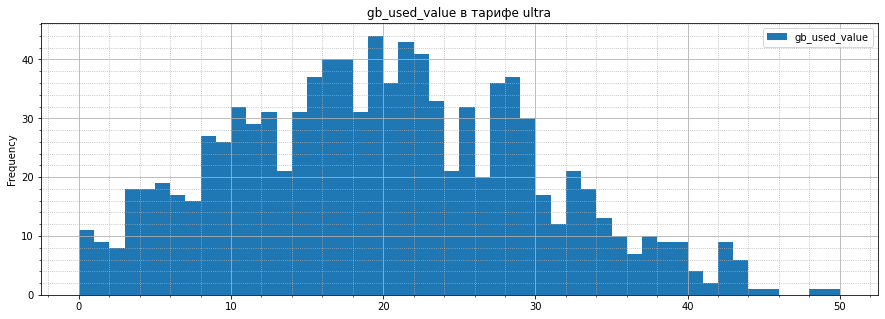

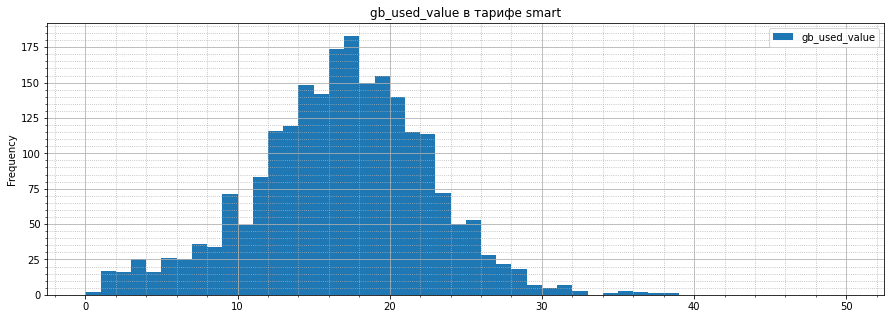

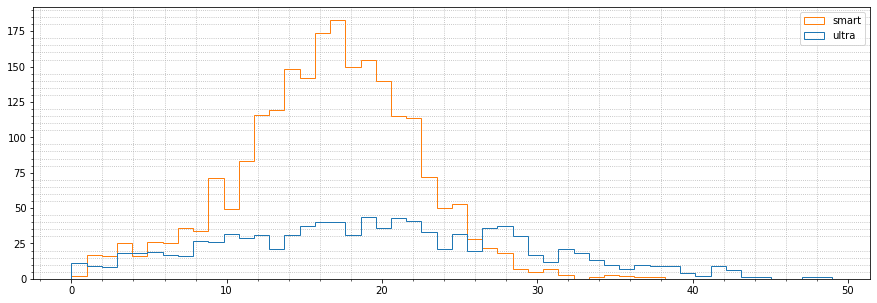

In [ ]:
indicator = 'gb_used_value'
range_for_all_hist = (0,50)
figsize_all_hist=(15,5)

print('Табличное описание данных')
display(df_total_info.query('column_name == @indicator'))

print('\nГистограммы частот')
df_total.query('tariff_name == "ultra"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе ultra',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

df_total.query('tariff_name == "smart"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе smart',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

ultra = df_total.query('tariff_name == "ultra"')[indicator]
smart = df_total.query('tariff_name == "smart"')[indicator]

plt.figure(figsize=figsize_all_hist)
plt.range = range_for_all_hist
plt.hist([ultra, smart], bins=50, label=['ultra', 'smart'],histtype='step')
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()


По показателю "изразходованного трафика" для одного абонента в месяц по тарифам:

**Среднее количество** Гб в тарифе ultra больше, чем в smart на 3 Гб:
   - ultra 19
   - smart 16


**Максимальное количество** Гб в тарифе ultra больше, чем в smart на 11:
   - ultra 49
   - smart 38



**Дисперсия** и **стандартное** отклюнение в тарифе ultra выше, чем в тарифе smart, т.е. разброс по продолжительности разговоров в тарифе ultra выше:
- Дисперсия
   - ultra 97
   - smart 33
- Стандартное отклонение
   - ultra 10
   - smart 6

Из графиков и таблицы видно, что:

- В тарифе ultra большая часть значений находится в интервале 12 - 27 сообщений
- В тарифе smart большая часть значений находится в интервале 13 - 20 сообщений




#### `rub_monthly_total` — общая плата за месяц в рублях

Табличное описание данных


,tarif_name,column_name,count,min,mean,max,25%,50%,75%,std,variance,x1,x2
8,ultra,rub_monthly_total,985,1950,2070,4800,1950,1950,1950,376.2,141516.7,1950,1950
17,smart,rub_monthly_total,2229,550,1290,6770,550,1023,1750,818.4,669785.7,550,3550



Гистограммы частот


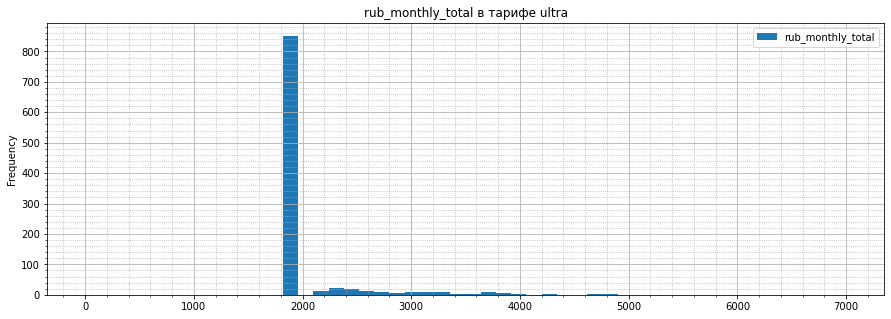

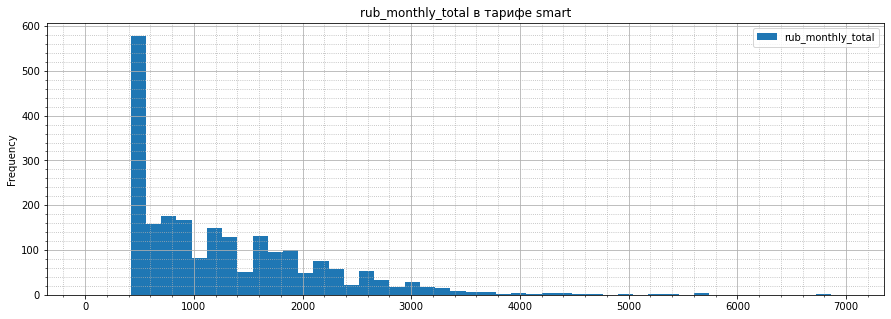

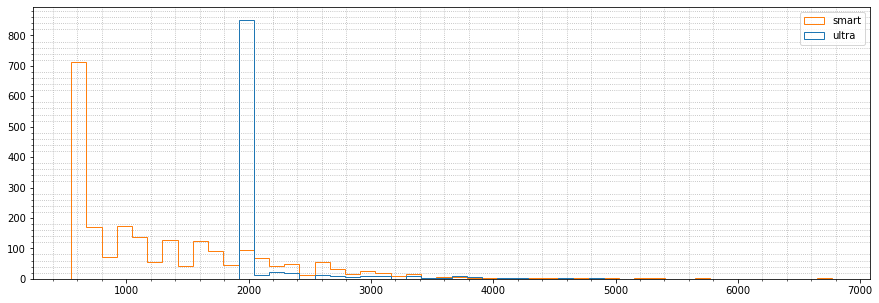

In [ ]:
indicator = 'rub_monthly_total'
range_for_all_hist = (0,7000)
figsize_all_hist=(15,5)

print('Табличное описание данных')
display(df_total_info.query('column_name == @indicator'))

print('\nГистограммы частот')
df_total.query('tariff_name == "ultra"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе ultra',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

df_total.query('tariff_name == "smart"').plot(
    kind = 'hist',
    y = indicator,
    bins=50,
    figsize=figsize_all_hist,
    title = indicator + ' в тарифе smart',
    grid=True,
    range = range_for_all_hist
)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

ultra = df_total.query('tariff_name == "ultra"')[indicator]
smart = df_total.query('tariff_name == "smart"')[indicator]

plt.figure(figsize=figsize_all_hist)
plt.range = range_for_all_hist
plt.hist([ultra, smart], bins=50, label=['ultra', 'smart'],histtype='step')
plt.legend(loc='upper right')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()

По показателю "общая плата за месяц в рублях" для одного абонента в месяц по тарифам:

**Средняя общая плата за месяц** в тарифе ultra больше, чем в smart на 780 рублей:
   - ultra 2'070
   - smart 1'290


**Максимальная общая плата за месяц** в тарифе ultra *меньше*, чем в smart на 1'970 рублей:
   - ultra 4'800
   - smart 6'770



**Дисперсия** и **стандартное** отклюнение в тарифе ultra выше, чем в тарифе smart, т.е. разброс по показателю в тарифе ultra выше:
- Дисперсия
   - ultra 141'517
   - smart 669'786
- Стандартное отклонение
   - ultra 376
   - smart 818

Из графиков и таблицы видно, что:

- В тарифе ultra большая часть значений находится в интервале 1'950 - 1'950 рублей в месяц
- В тарифе smart большая часть значений находится в интервале 550 - 1'750 рублей в месяц




#### Динамика `rub_monthly_total` по тарифам

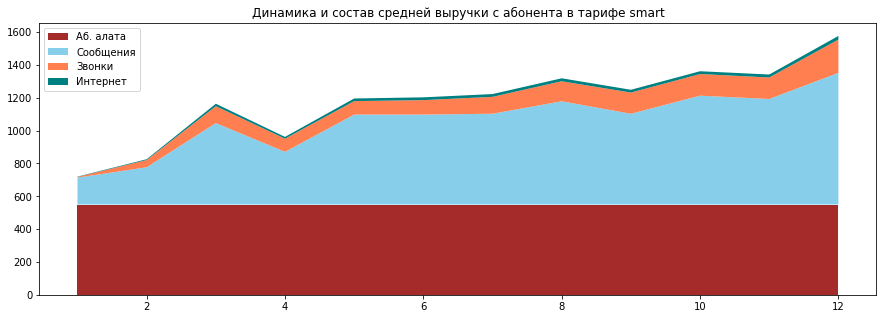

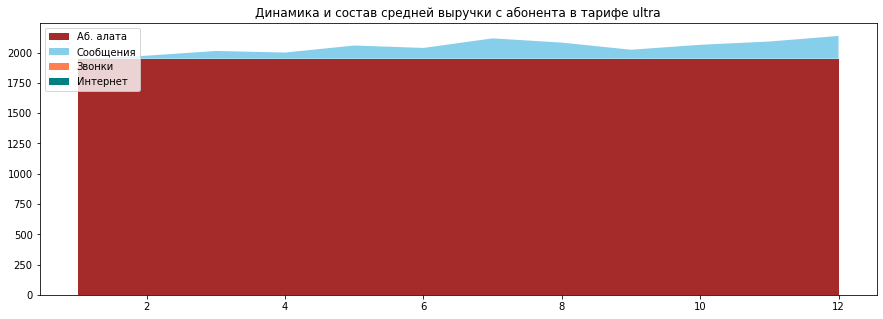

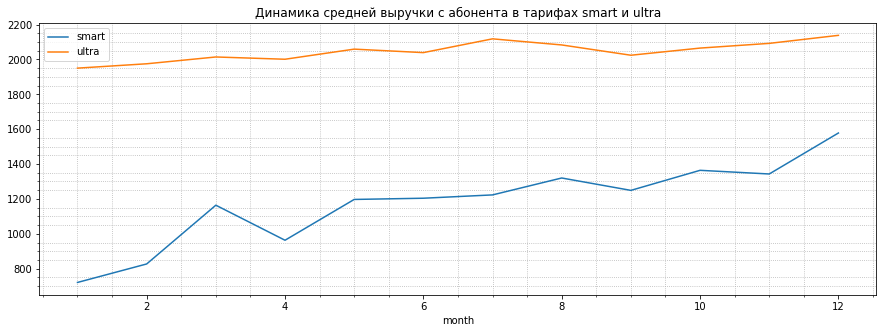

In [ ]:
#Динамика выручки по тарифам в разрезе составлияющих затрат
for tarif_for_tarif_pivot in ['smart', 'ultra']:

    tarif_pivot = pd.pivot_table(
        df_total.query('tariff_name == @tarif_for_tarif_pivot'),
        index = 'month',
        values = ['message_over_rub','gb_over_rub','minutes_over_rub','rub_monthly_fee'],
        aggfunc = 'mean'
    )

    tarif_pivot.columns = ['message_over_rub','gb_over_rub','minutes_over_rub','rub_monthly_fee']
    tarif_pivot[['message_over_rub','gb_over_rub','minutes_over_rub','rub_monthly_fee']] = tarif_pivot[['message_over_rub','gb_over_rub','minutes_over_rub','rub_monthly_fee']].astype('int')
    tarif_pivot = tarif_pivot.reset_index(drop = False)

    #Проверка
    #display(tarif_pivot)

    x = tarif_pivot['month']
    y = np.vstack([
        tarif_pivot['rub_monthly_fee'],
        tarif_pivot['message_over_rub'],
        tarif_pivot['minutes_over_rub'],
        tarif_pivot['gb_over_rub']

    ])

    plt.figure(figsize=(15,5))
    plt.title('Динамика и состав средней выручки с абонента в тарифе ' + tarif_for_tarif_pivot)

    plt.stackplot(x, y, labels=['Аб. алата','Сообщения',  'Звонки', 'Интернет'], colors=['brown', 'skyblue', 'coral', 'teal' ])
    plt.legend(loc='upper left')
    plt.show()


#Сравнение тарифов
tarif_pivot = pd.pivot_table(
    df_total,
    index = 'month',
    columns = 'tariff_name',
    values = 'rub_monthly_total',
    aggfunc = 'mean',
)
tarif_pivot.columns = ['smart','ultra']
tarif_pivot[['smart','ultra']] = tarif_pivot[['smart','ultra']].astype('int')
tarif_pivot = tarif_pivot.reset_index(drop = False)

#Проверка
#display(tarif_pivot)


tarif_pivot.plot(x = 'month', y = ['smart','ultra'], figsize=(15,5))
plt.title('Динамика средней выручки с абонента в тарифах smart и ultra')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.show()


Из графиков видно, что:
 - Средняя выручка в тарифе "ultra" выше, чем в тарифе "smart";
 - Прирост средней выпучки в тарифе "smart" выше, чем в тарифе "ultra";
 - В каждом из тарифов прирост обеспечен в большей степени за счёт роста затрат на сообщения;
 - Большая часть выручки в тарифе "ultra" обеспечивается абонентской платой;
 - В тарифе "smart" в начале года большую часть выоручки с абонентов составляла абонентская плата, но со 2го месяца затраты на сообщения стали превышать абонентскую плату

# Шаг 4. Проверьте гипотезы

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Нулевая гипотиза**: Средняя выручка для тарифа ultra и тарифа smart равны

**Альтернативная гипотеза**: Средняя выручка для тарифа ultra и тарифа smart **не** равны

Для её проверки воспользуюсь методом `scipy.stats.ttest_ind (array1, array2, equal_var)`

Для определения `equal_var` сравню дисперсии:

In [ ]:
display(df_total_info.query('column_name == "rub_monthly_total"')[['tarif_name','variance']])

,tarif_name,variance
8,ultra,141516.7
17,smart,669785.7


In [ ]:
df_total.head()

,user_id,city,tariff_name,month,message_count,message_over_rub,gb_used_value,gb_over_rub,calls_count,calls_duration,minutes_over_rub,rub_monthly_fee,rub_monthly_total
0,1000,Краснодар,ultra,5,22,0,3,0,17,159,0,1950,1950
1,1000,Краснодар,ultra,6,60,0,23,0,28,172,0,1950,1950
2,1000,Краснодар,ultra,7,75,0,14,0,41,340,0,1950,1950
3,1000,Краснодар,ultra,8,81,0,14,0,42,408,0,1950,1950
4,1000,Краснодар,ultra,9,57,0,15,0,46,466,0,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,smart,10,42,0,21,1200,30,247,0,550,1750
3210,1499,Пермь,smart,9,11,0,2,0,8,70,0,550,550
3211,1499,Пермь,smart,10,48,0,18,600,44,449,0,550,1150
3212,1499,Пермь,smart,11,59,27,18,600,62,612,336,550,1513


In [ ]:
#Дисперсии отличаются, поэтому equal_var = False

results = st.ttest_ind (
    df_total.query('tariff_name == "smart"')['rub_monthly_total'] ,
    df_total.query('tariff_name == "ultra"')['rub_monthly_total'] ,
    equal_var = False
)

alpha = 0.01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

print('p-значение:', results.pvalue )

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние равны")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу, средние не равны


Следовательно, верна альтернативная гипотеза: средняя выручка для тарифов smart и ultra не равны


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Нулевая гипотиза**: Средняя выручка пользователей из Москвы и пользователей из других регионов равны

**Альтернативная гипотеза**: Средняя выручка пользователей из Москвы и пользователей из других регионов **не** равны

Для её проверки воспользуюсь методом `scipy.stats.ttest_ind (array1, array2, equal_var)`

Для определения `equal_var` сравню дисперсии.

In [ ]:
#Шаг 1. Нужно к таблице df_total присоединить город из справочника абонентов users
df_total_by_city = df_total[['user_id','rub_monthly_total']].merge(df_users[['user_id','city']], on = 'user_id')

#Проверяю
#display(df_total_by_city)

#Шаг 2. Делаю выборки из df_total_by_city для Москвы и не_Москвы
#Сравниваю дисперсии
df_total_by_moskow = df_total.query('city == "Москва"')
df_total_by_other  = df_total.query('city != "Москва"')

#Проверяю
#print(df_total_by_moskow['city'].unique())
#print(df_total_by_other ['city'].sort_values().unique())
#Ок

print('Дисперсия для Москвы:', round(np.var(df_total_by_moskow['rub_monthly_total'], ddof=1),0))
print('Дисперсия для других:', round(np.var(df_total_by_other ['rub_monthly_total'], ddof=1),0))

#Дисперсии различаются, поэтому  equal_var = False

results = st.ttest_ind (
    df_total_by_moskow['rub_monthly_total'] ,
    df_total_by_other['rub_monthly_total'] ,
    equal_var = False
)

alpha = 0.01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

print('p-значение:', results.pvalue )

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние равны")




Дисперсия для Москвы: 565636.0
Дисперсия для других: 654138.0
p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу, средние равны


Посмотрим на распределение выручки по регионам

<AxesSubplot:title={'center':'Распределение средней выручки по регионам'}, xlabel='city'>

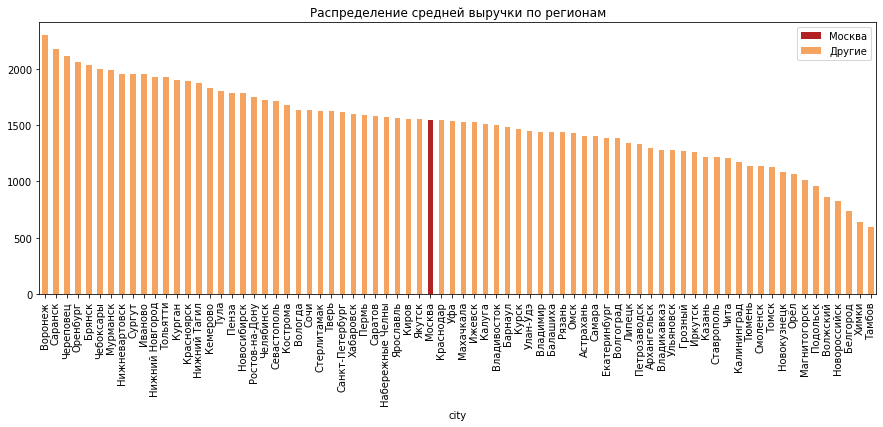

In [ ]:
city_pivot = pd.pivot_table(
    df_total,
    index = 'city',
    values = 'rub_monthly_total',
    aggfunc = 'mean',
)
city_pivot.columns = ['rub_monthly_total']
city_pivot['rub_monthly_total'] = city_pivot['rub_monthly_total'].astype('int')
city_pivot['city'] = city_pivot.index
city_pivot = city_pivot.sort_values(by = 'rub_monthly_total', ascending = False)
city_pivot['Москва'] = city_pivot.query('city == "Москва"')['rub_monthly_total'].astype('int64')
city_pivot['Другие'] = city_pivot.query('city != "Москва"')['rub_monthly_total'].astype('int64')

#Проверка
#display(city_pivot)

city_pivot.plot(
    x='city',
    y=['Москва', 'Другие'],
    kind="bar",
    figsize = (15,5),
    stacked=True,
    color={'Москва': 'firebrick', 'Другие': 'sandybrown'},
    title = 'Распределение средней выручки по регионам'
)

### Ответ на вопросы

**Как вы формулировали нулевую и альтернативную гипотезы?**
Нулевая гипотеза и Альтернативная должны быть взаимоисключающими.
Так как обе гипотезы, предполагают сравнение выручки, то для обоих случаев я выбрал нулевую гипотезу, что средние выручки равны, и альтернативную, что средние выручки не равны.
Т.е., если нулевая гипотеза верна и выручки равны, то не равны при этом они быть уже не могут

**Какой критерий использовали для проверки гипотез и почему.**
Так как обе гипотезы предполагают сравнение средних для двух выборок, то был выбран метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:
`scipy.stats.ttest_ind (array1, array2, equal_var)`

# Общие выводы

## В ходе работы были:
- Подключены библиотеки, необходимые для работы;
- Написаны функции, которые понадобятся для работы;
- Получены данные из .csv файлов по звонкам, сообщениям, интернет-трафику, тарифам и абонентам;
- Данные были изучены и подготовлены, приведены к нужным типам данных;
- Добавлены столбцы, необходимые для дальнейшей работы;
- Для каждого пользователя найдено:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя;
- Таблицы были сведены в единый датафрейм, к которому добавлены данные из таблицы-справочника по тарифам и пользователям при помощи методов `concat()` и `merge()`
- Данные были проанализированы при помощи метода `describe()` и гистограмм;
- Гипотезы были проверены

## Вывод по анализу данных:
- Пользователи на тарифе ultra по сравнению с тарифом smart в среднем используют в месяц больше минут разговоров сообщений и Гб интернета;
- На тарифе ultra по сравнению с тарифом smart больше разброс по показателям разговоров, сообщений и интернет трафика;
- Большая часть пользователей (75%) на тарифе ultra платят 1950 рублей, т.е. оплачивают только стоимость тарифа;
- Большая часть пользователей на тарифе smart платят от 550 до 1750 рублей в месяц, т.е количество абонентов, которое не укладывается в рамки абонентской платы больше в % соотношении;
- Гипотеза о том, что средняя выручка для тарифов smart и ultra равны, не подтвердилась;
- Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, не подтвердилась;

## Ответ на вопрос проекта: какой тариф приносит больше денег?
Больше денег ежемесячно приносит тариф "ultra"